In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import json
import config

In [73]:
CONFIG = config.get_config()
dtypes = config.get_types_of_attributes()
df = pd.concat((pd.read_csv(f, sep=CONFIG['CSV_SEPARATOR'], compression='gzip', na_values=CONFIG['NA_VALUES'], dtype=dtypes) for f in ['data/train_a/train.csv.gz']))
df.head()

,player_id,feature_1_games_30d,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_15,feature_16,feature_17,feature_18,test_games_7d,test_spend_7d,player_group,activity_change,spend,weight_spend
0,3825589,676.0,RUc,952.0,209.0,27.0,873.0,YW5kc,YXI,dGVjb,...,8.0,8.0,10.0,ZWdhbF9zdHJp,95.0,0.0,A,1.643056,1.643056,17589.000000
1,2662348,283.0,VVM,3144.0,35.0,12.0,344.0,aW9z,ZW4,YXBwb,...,0.0,0.0,0.0,LTA0OjAw,192.0,0.0,A,0.342142,0.342142,35178.000000
2,767881,2.0,Q0E,8.0,0.0,2.0,2.0,aW9z,ZW4,YXBwb,...,0.0,0.0,0.0,LTA1OjAw,158.0,1.0,A,0.002935,0.002935,35178.000000
3,720936,0.0,TVk,207.0,0.0,1.0,0.0,YW5kc,emg,dml2b,...,0.0,1.0,0.0,KzA4OjAw,12.0,0.0,A,0.000000,0.000000,6.339521
4,507063,0.0,NaN,0.0,0.0,0.0,0.0,NaN,ZW4,NaN,...,0.0,0.0,0.0,NaN,32.0,68.0,A,0.000000,0.000000,6.339521


In [76]:
""" Plot pair wise/joint distribution chart"""
def plot_data(all_files, x, y, diag_kind='kde'):
    CONFIG = config.get_config()
    dtypes = config.get_types_of_attributes()
    df = pd.concat((pd.read_csv(f, sep=CONFIG['CSV_SEPARATOR'], compression='gzip', na_values=CONFIG['NA_VALUES'], dtype=dtypes) for f in all_files))
    
    sns.pairplot(df, height=3, x_vars=x,y_vars=y, diag_kind=diag_kind)

def plot_correlation(all_files):
    CONFIG = config.get_config()
    dtypes = config.get_types_of_attributes()
    df = pd.concat((pd.read_csv(f, sep=CONFIG['CSV_SEPARATOR'], compression='gzip', na_values=CONFIG['NA_VALUES'], dtype=dtypes) for f in all_files))
    categorical_columns = ["player_id",
            "feature_2",
            "feature_7",
            "feature_8",
            "feature_9",
            "feature_14",
            "feature_18",
            "player_group"]
    for column in categorical_columns:
        df[column] = df[column].astype('category').cat.codes
        corr= df[df.columns[1:]].corr()
        print(corr)
        sns.heatmap(corr)

In [74]:
CONFIG = config.get_config()
dtypes = config.get_types_of_attributes()
df = pd.concat((pd.read_csv(f, sep=CONFIG['CSV_SEPARATOR'], compression='gzip', na_values=CONFIG['NA_VALUES'], dtype=dtypes) for f in ['data/train_a/train.csv.gz']))
# print(( df['spend'].count() / df['spend'].round(0).value_counts()))
# print(df['spend'].value_counts())
# d = df( df['spend'].value_counts() / df['spend'].count())
df['w'] = df['spend'].count() / df.groupby('spend')['spend'].transform('count')
print(df[['w', 'spend']])
# print(d)

                  w     spend
0      12312.500000  1.643056
1      24625.000000  0.342142
2      24625.000000  0.002935
3          6.264309  0.000000
4          6.264309  0.000000
5       8208.333333  1.140741
6      24625.000000  0.059690
7          6.264309  0.000000
8       8208.333333  3.780000
9       1894.230769  7.000000
10      4104.166667  2.266667
11     24625.000000  0.405141
12       985.000000  0.388889
13     24625.000000  0.959031
14      6156.250000  0.054902
15     24625.000000  0.704341
16      8208.333333  0.840686
17      4925.000000  0.446078
18      3078.125000  2.177778
19       432.017544  0.077778
20      1894.230769  0.800000
21         6.264309  0.000000
22       110.426009  0.233333
23     12312.500000  2.206944
24      4104.166667  0.102083
25      2052.083333  1.808333
26     24625.000000  2.911702
27     24625.000000  1.149758
28         6.264309  0.000000
29      8208.333333  0.523577
...             ...       ...
24595   2238.636364  0.738889
24596  123

In [9]:
os.environ['GA_CONFIG_PATH'] = 'config_spend_regressor_a.json'
CONFIG = config.get_config()
dataset = ['data/train_a/train.csv.gz']
dataset_eval = ['data/eval_a/eval.csv.gz']

                     feature_1_games_30d  feature_3  feature_4  feature_5  \
feature_1_games_30d             1.000000   0.864228   0.664359   0.685345   
feature_3                       0.864228   1.000000   0.446908   0.651908   
feature_4                       0.664359   0.446908   1.000000   0.505342   
feature_5                       0.685345   0.651908   0.505342   1.000000   
feature_6                       0.986360   0.862563   0.645986   0.696376   
feature_10                      0.184379   0.317449   0.018790   0.338585   
feature_11                      0.014049   0.014122   0.012935   0.026853   
feature_12                      0.120247   0.142204   0.012993   0.120714   
feature_13                      0.585530   0.708402   0.258388   0.583048   
feature_15                      0.349180   0.282843   0.407660   0.276209   
feature_16                      0.102415   0.069528   0.175609   0.072643   
feature_17                      0.111212   0.080156   0.178578   0.088040   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.128392   0.864228   0.664359   
feature_2                       0.128392   1.000000   0.129065   0.118382   
feature_3                       0.864228   0.129065   1.000000   0.446908   
feature_4                       0.664359   0.118382   0.446908   1.000000   
feature_5                       0.685345   0.225798   0.651908   0.505342   
feature_6                       0.986360   0.133299   0.862563   0.645986   
feature_7                       0.147407   0.338916   0.170420   0.098026   
feature_10                      0.184379   0.162977   0.317449   0.018790   
feature_11                      0.014049   0.030895   0.014122   0.012935   
feature_12                      0.120247   0.033758   0.142204   0.012993   
feature_13                      0.585530   0.170719   0.708402   0.258388   
feature_15                      0.349180   0.094259   0.282843   0.407660   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.128392   0.864228   0.664359   
feature_2                       0.128392   1.000000   0.129065   0.118382   
feature_3                       0.864228   0.129065   1.000000   0.446908   
feature_4                       0.664359   0.118382   0.446908   1.000000   
feature_5                       0.685345   0.225798   0.651908   0.505342   
feature_6                       0.986360   0.133299   0.862563   0.645986   
feature_7                       0.147407   0.338916   0.170420   0.098026   
feature_8                       0.097966   0.272492   0.110788   0.071231   
feature_9                       0.102070   0.132649   0.079784   0.121707   
feature_10                      0.184379   0.162977   0.317449   0.018790   
feature_11                      0.014049   0.030895   0.014122   0.012935   
feature_12                      0.120247   0.033758   0.142204   0.012993   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.128392   0.864228   0.664359   
feature_2                       0.128392   1.000000   0.129065   0.118382   
feature_3                       0.864228   0.129065   1.000000   0.446908   
feature_4                       0.664359   0.118382   0.446908   1.000000   
feature_5                       0.685345   0.225798   0.651908   0.505342   
feature_6                       0.986360   0.133299   0.862563   0.645986   
feature_7                       0.147407   0.338916   0.170420   0.098026   
feature_8                       0.097966   0.272492   0.110788   0.071231   
feature_9                       0.102070   0.132649   0.079784   0.121707   
feature_10                      0.184379   0.162977   0.317449   0.018790   
feature_11                      0.014049   0.030895   0.014122   0.012935   
feature_12                      0.120247   0.033758   0.142204   0.012993   

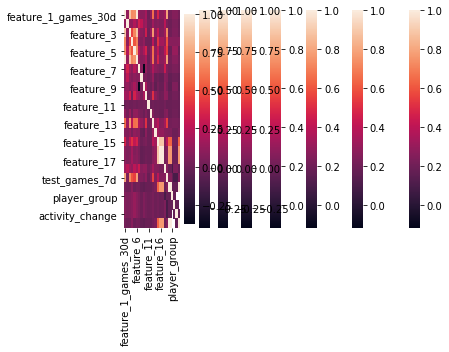

In [10]:
plot_correlation(dataset_eval)

                     feature_1_games_30d  feature_3  feature_4  feature_5  \
feature_1_games_30d             1.000000   0.864119   0.661159   0.688274   
feature_3                       0.864119   1.000000   0.445878   0.647445   
feature_4                       0.661159   0.445878   1.000000   0.467297   
feature_5                       0.688274   0.647445   0.467297   1.000000   
feature_6                       0.982508   0.858411   0.633340   0.698578   
feature_10                      0.194984   0.311712   0.033854   0.341639   
feature_11                      0.022318   0.021986   0.018666   0.041916   
feature_12                      0.140226   0.172402  -0.005169   0.155743   
feature_13                      0.577335   0.701321   0.245641   0.588602   
feature_15                      0.371808   0.316922   0.370268   0.300491   
feature_16                      0.122802   0.096200   0.140160   0.083438   
feature_17                      0.131982   0.107929   0.141640   0.101005   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.135548   0.864119   0.661159   
feature_2                       0.135548   1.000000   0.134619   0.106288   
feature_3                       0.864119   0.134619   1.000000   0.445878   
feature_4                       0.661159   0.106288   0.445878   1.000000   
feature_5                       0.688274   0.242125   0.647445   0.467297   
feature_6                       0.982508   0.139101   0.858411   0.633340   
feature_7                       0.154810   0.341681   0.174296   0.102221   
feature_10                      0.194984   0.174091   0.311712   0.033854   
feature_11                      0.022318   0.047031   0.021986   0.018666   
feature_12                      0.140226   0.062134   0.172402  -0.005169   
feature_13                      0.577335   0.165061   0.701321   0.245641   
feature_15                      0.371808   0.098939   0.316922   0.370268   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.135548   0.864119   0.661159   
feature_2                       0.135548   1.000000   0.134619   0.106288   
feature_3                       0.864119   0.134619   1.000000   0.445878   
feature_4                       0.661159   0.106288   0.445878   1.000000   
feature_5                       0.688274   0.242125   0.647445   0.467297   
feature_6                       0.982508   0.139101   0.858411   0.633340   
feature_7                       0.154810   0.341681   0.174296   0.102221   
feature_8                       0.111402   0.260442   0.116188   0.070978   
feature_9                       0.113339   0.150086   0.091153   0.118990   
feature_10                      0.194984   0.174091   0.311712   0.033854   
feature_11                      0.022318   0.047031   0.021986   0.018666   
feature_12                      0.140226   0.062134   0.172402  -0.005169   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.135548   0.864119   0.661159   
feature_2                       0.135548   1.000000   0.134619   0.106288   
feature_3                       0.864119   0.134619   1.000000   0.445878   
feature_4                       0.661159   0.106288   0.445878   1.000000   
feature_5                       0.688274   0.242125   0.647445   0.467297   
feature_6                       0.982508   0.139101   0.858411   0.633340   
feature_7                       0.154810   0.341681   0.174296   0.102221   
feature_8                       0.111402   0.260442   0.116188   0.070978   
feature_9                       0.113339   0.150086   0.091153   0.118990   
feature_10                      0.194984   0.174091   0.311712   0.033854   
feature_11                      0.022318   0.047031   0.021986   0.018666   
feature_12                      0.140226   0.062134   0.172402  -0.005169   

                     feature_1_games_30d  feature_2  feature_3  feature_4  \
feature_1_games_30d             1.000000   0.135548   0.864119   0.661159   
feature_2                       0.135548   1.000000   0.134619   0.106288   
feature_3                       0.864119   0.134619   1.000000   0.445878   
feature_4                       0.661159   0.106288   0.445878   1.000000   
feature_5                       0.688274   0.242125   0.647445   0.467297   
feature_6                       0.982508   0.139101   0.858411   0.633340   
feature_7                       0.154810   0.341681   0.174296   0.102221   
feature_8                       0.111402   0.260442   0.116188   0.070978   
feature_9                       0.113339   0.150086   0.091153   0.118990   
feature_10                      0.194984   0.174091   0.311712   0.033854   
feature_11                      0.022318   0.047031   0.021986   0.018666   
feature_12                      0.140226   0.062134   0.172402  -0.005169   

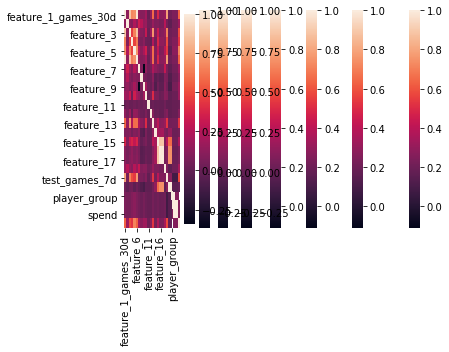

In [77]:
plot_correlation(dataset)

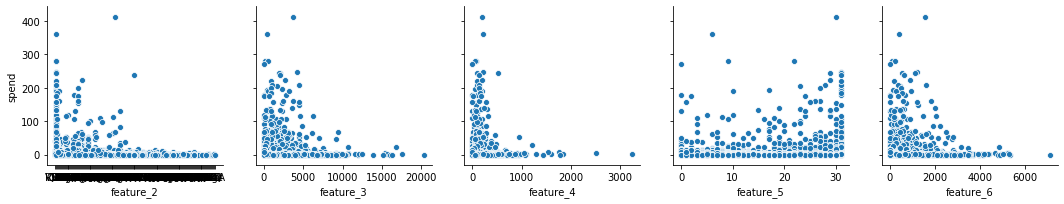

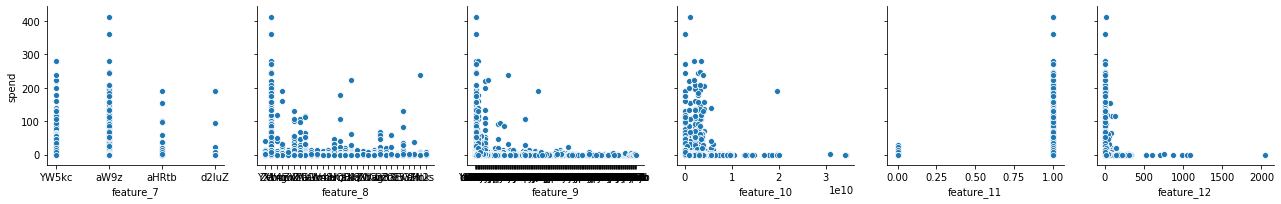

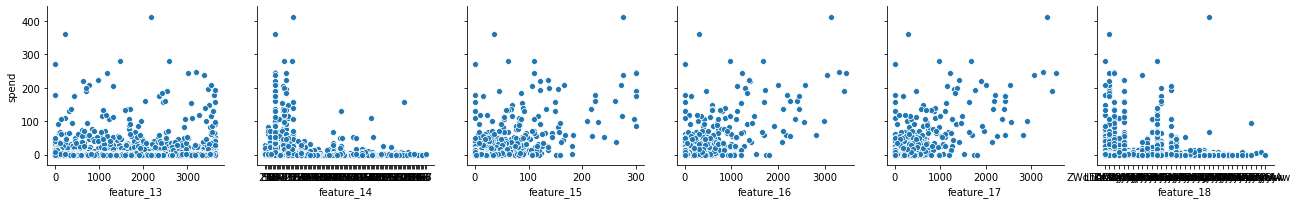

In [39]:
plot_data(dataset, x=[ "feature_{}".format(i) for i in range(2,7) ], y = ['spend'], diag_kind='kde')
plot_data(dataset, x=[ "feature_{}".format(i) for i in range(7,13) ], y = ['spend'], diag_kind='kde')
plot_data(dataset, x=[ "feature_{}".format(i) for i in range(13,19) ], y = ['spend'], diag_kind='kde')

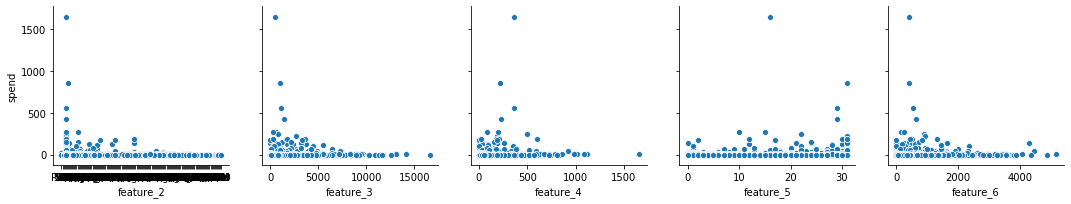

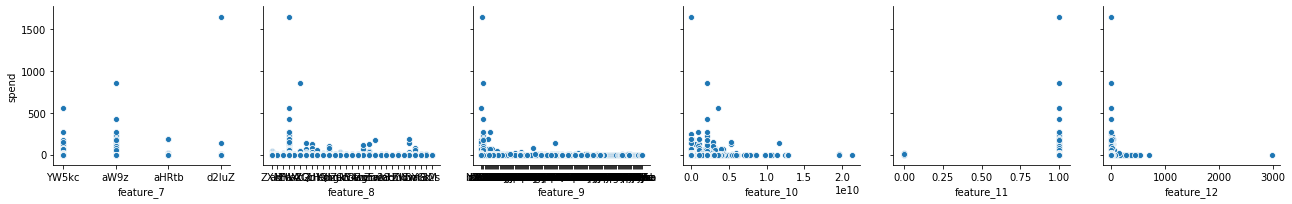

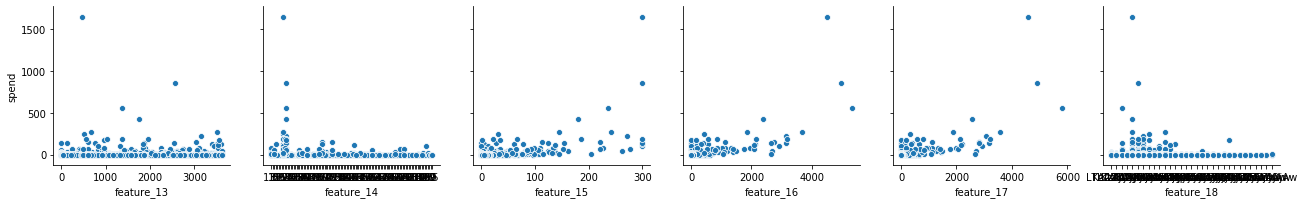

In [40]:
os.environ['GA_CONFIG_PATH'] = 'config_spend_regressor_a.json'
CONFIG = config.get_config()
dataset = ['data/eval_a/eval.csv.gz']
plot_data(dataset, x=[ "feature_{}".format(i) for i in range(2,7) ], y = ['spend'], diag_kind='kde')
plot_data(dataset, x=[ "feature_{}".format(i) for i in range(7,13) ], y = ['spend'], diag_kind='kde')
plot_data(dataset, x=[ "feature_{}".format(i) for i in range(13,19) ], y = ['spend'], diag_kind='kde')

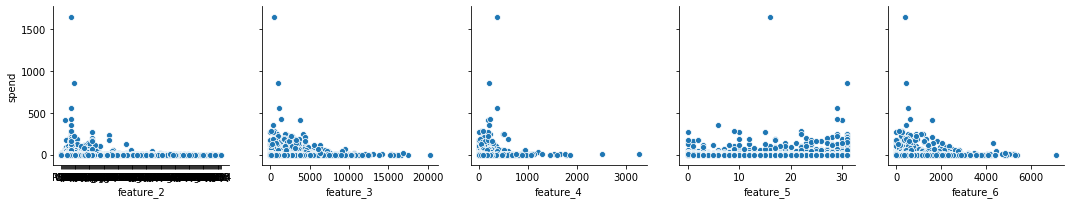

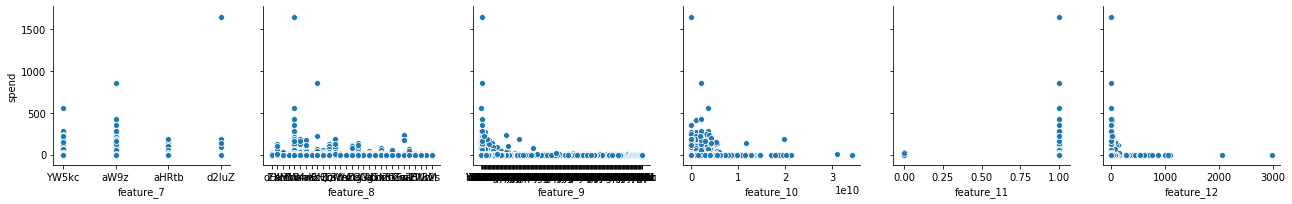

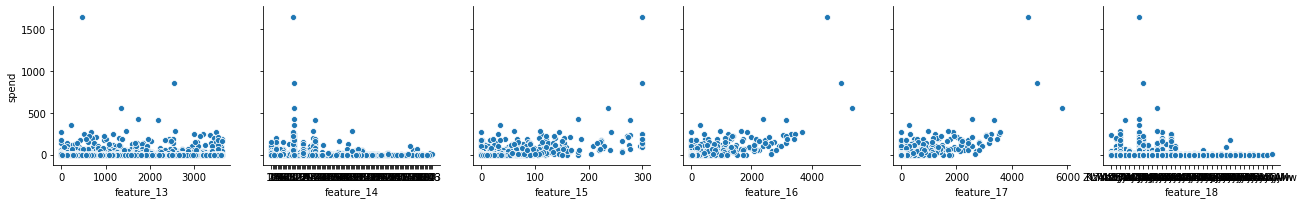

In [35]:
os.environ['GA_CONFIG_PATH'] = 'config_spend_regressor_a.json'
CONFIG = config.get_config()
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(2,7) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(7,13) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(13,19) ], y = ['spend'], diag_kind='kde')

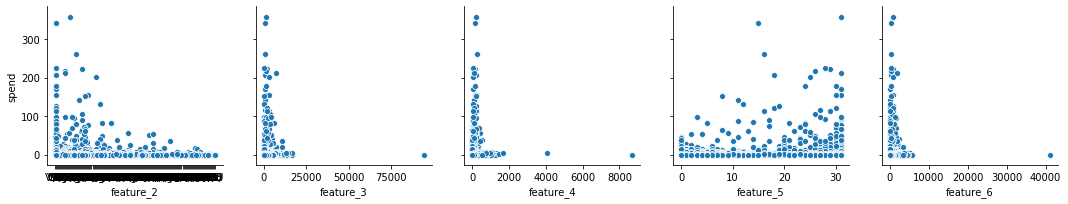

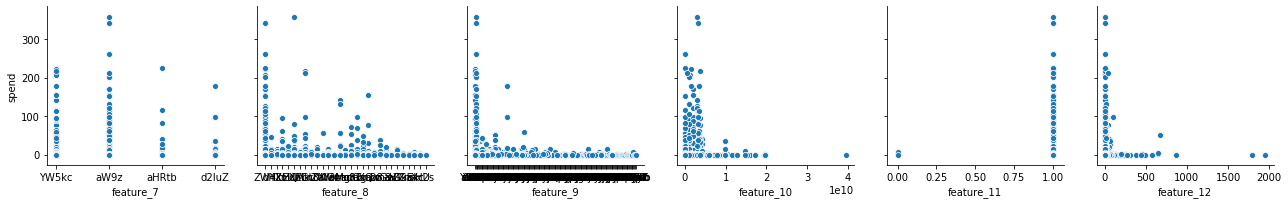

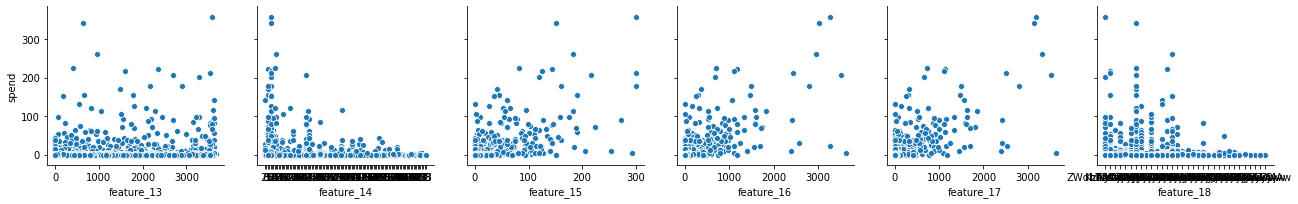

In [36]:
os.environ['GA_CONFIG_PATH'] = 'config_spend_regressor_b.json'
CONFIG = config.get_config()
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(2,7) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(7,13) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(13,19) ], y = ['spend'], diag_kind='kde')

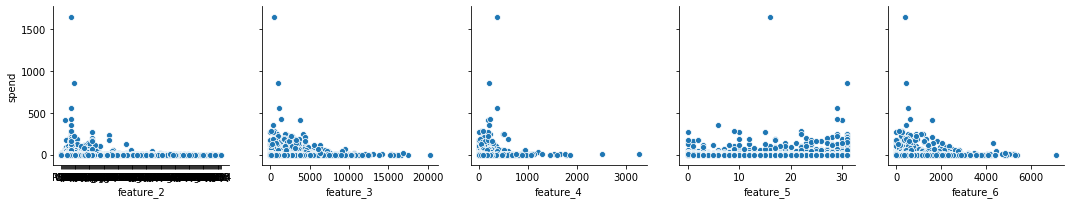

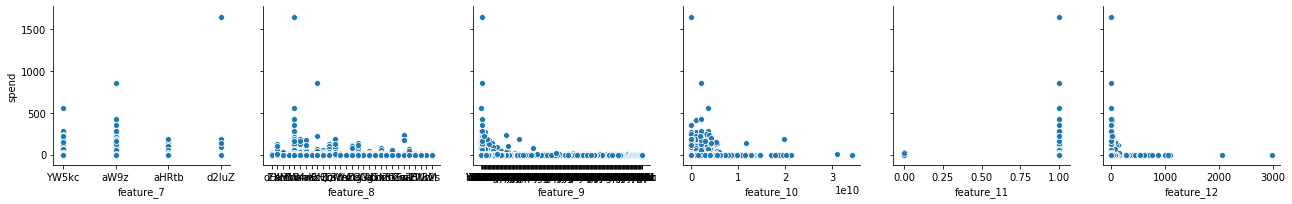

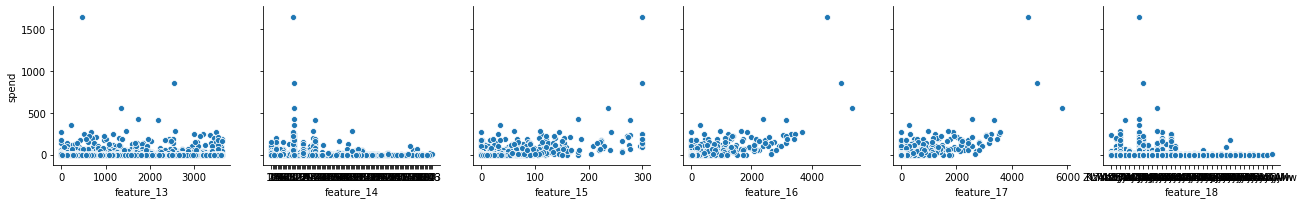

In [37]:
os.environ['GA_CONFIG_PATH'] = 'config_activity_regressor_a.json'
CONFIG = config.get_config()
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(2,7) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(7,13) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(13,19) ], y = ['spend'], diag_kind='kde')

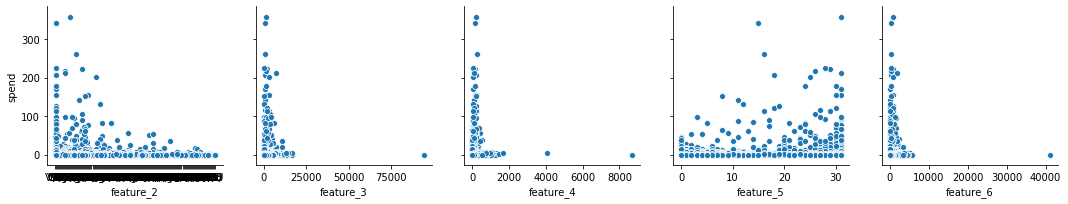

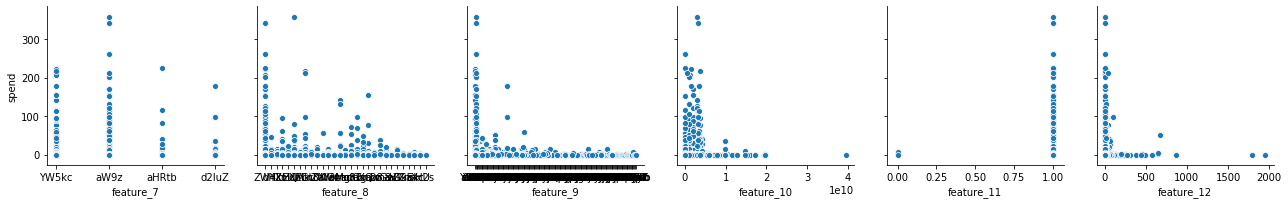

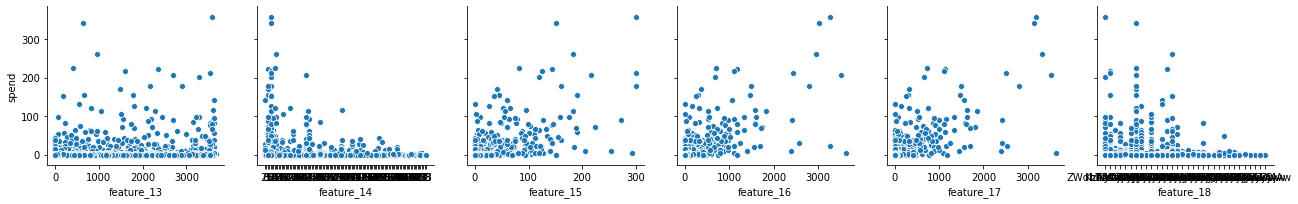

In [38]:
os.environ['GA_CONFIG_PATH'] = 'config_activity_regressor_b.json'
CONFIG = config.get_config()
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(2,7) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(7,13) ], y = ['spend'], diag_kind='kde')
plot_data(CONFIG['DATASET_FILES'], x=[ "feature_{}".format(i) for i in range(13,19) ], y = ['spend'], diag_kind='kde')